In [1]:
from __future__ import print_function
import os
try:
    from urllib.request import urlretrieve
except ImportError:
    from urllib import urlretrieve

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import string
import warnings

# for all NLP related operations on text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
#from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing

import datetime as dt


# To identify the sentiment of text
#from textblob import TextBlob
#from textblob.sentiments import NaiveBayesAnalyzer
#from textblob.np_extractors import ConllExtractor

# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


In [4]:
all_ticket_df=pd.read_csv('all_ticketsnew.csv', encoding='utf-8')

labelData = all_ticket_df['ticket_type']
data = all_ticket_df['body']

# Split dataset into training and testing data
train_data, test_data, train_labels, test_labels = train_test_split(
        data, labelData, test_size=0.2
    )  # split data to train/test sets with 80:20 ratio


In [6]:
import tensorflow as tf


In [11]:
from numpy import array
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding

In [12]:
# load the whole embedding into memory
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=100000)
tokenizer.fit_on_texts(train_data)
X_train = tokenizer.texts_to_sequences(train_data)
X_test = tokenizer.texts_to_sequences(test_data)
vocab_length = len(tokenizer.word_index) + 1

In [ ]:
#from nltk.tokenize import word_tokenize
#corpus = all_ticket_df['body'].to_list()
#all_words = []
#for sent in corpus:
#    tokenize_word = word_tokenize(sent)
#    for word in tokenize_word:
#        all_words.append(word)

#unique_words = set(all_words)
#print(len(unique_words))
#vocab_length =len(unique_words)

In [13]:
corpus = all_ticket_df['body'].to_list()
word_count = lambda sentence: len(word_tokenize(sentence))
longest_sentence = max(corpus, key=word_count)
length_long_sentence = len(word_tokenize(longest_sentence))


print(length_long_sentence)

952


In [14]:
#padded_sentences = pad_sequences(embedded_sentences, length_long_sentence, padding='post')
X_train_pedd = pad_sequences(X_train, length_long_sentence, padding='post')
X_test_pedd = pad_sequences(X_test, length_long_sentence, padding='post')

In [20]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
        
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training Accuracy')
    plt.plot(x, val_acc, 'r', label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Model Loss')
    plt.legend()
    

In [16]:
# define model
from tensorflow.keras import layers
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_length, 
                           output_dim=embedding_dim, 
                           input_length=length_long_sentence,
                           trainable=True))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
#model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 952, 100)          832600    
_________________________________________________________________
flatten (Flatten)            (None, 95200)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                952010    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 1,784,621
Trainable params: 1,784,621
Non-trainable params: 0
_________________________________________________________________


In [17]:
# fit the model
#history = model.fit(padded_sentences, all_ticket_df['ticket_type'], epochs=100, verbose=1)
y_train = train_labels 
y_test = test_labels

history = model.fit(X_train_pedd, y_train,
                    epochs=5,
                    verbose=True,
                    validation_data=(X_test_pedd, y_test), batch_size=10)


print(type(history))


Epoch 1/5
1460/1460 [==============================] - 18s 13ms/step - loss: nan - accuracy: 0.4979 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/5
1460/1460 [==============================] - 18s 12ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/5
1460/1460 [==============================] - 18s 12ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/5
1460/1460 [==============================] - 24s 16ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/5
1460/1460 [==============================] - 18s 13ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
<class 'tensorflow.python.keras.callbacks.History'>


Training Accuracy: 0.0000
Testing Accuracy:  0.0000
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


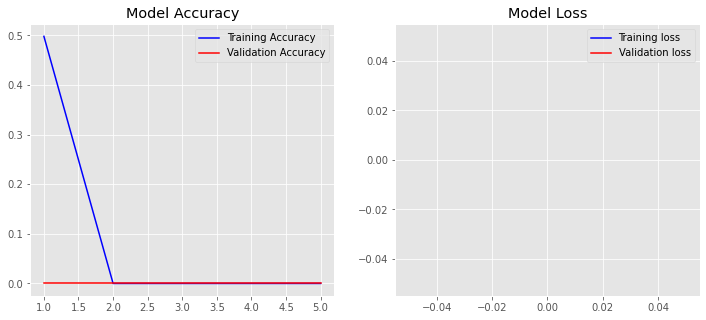

In [21]:
# evaluate the model
#loss, accuracy = model.evaluate(padded_sentences, all_ticket_df['ticket_type'], verbose=0)
#print('Accuracy: %f' % (accuracy*100))

loss, accuracy = model.evaluate(X_train_pedd, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy*100))

loss, accuracy = model.evaluate(X_test_pedd, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy*100))

print(history.history.keys())
plot_history(history)

In [22]:
#Predict

textd_1 ="hello movement has left available device please kind device denmark copenhagen denmark please source quotation shipping by lead"
textd_2 ="cannot submit hours getting error job defined for person assignment human resources application error"

testd =[textd_1,textd_2]
testd_tokens = tokenizer.texts_to_sequences(testd)
testd_tokens_pad = pad_sequences(testd_tokens, length_long_sentence, padding='post')

model.predict(x=testd_tokens_pad)

array([[nan],
       [nan]], dtype=float32)